# Linear Regression

In [1]:
# External Modules
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm

In [2]:
# fixed random seed
np.random.seed(10)

def linear_random_data(sample_size, a, b, x_min, x_max, noise_factor):
    '''creates a randam data set
    
    Args:
        sample_size: number of data points
        a: coefficent of x^0
        b: coefficent of x^1
        x_min: lower bound value range
        x_max: upper bound value range
        noise_factor: strength of noise added to y 
    
    Returns:
        x: array of x values | len(x)==len(y)
        y: array of y values corresponding to x | len(x)==len(y)
    '''
    x = np.random.uniform (x_min, x_max, sample_size)
    noise = np.random.randn(sample_size)
    y = a + b * x + noise * noise_factor
    return x, y

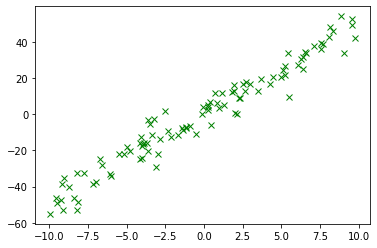

In [3]:
x, y = linear_random_data(sample_size=100, a=0., b=5., x_min=-10, x_max=10, noise_factor=6)
plt.plot(x,y, "gx")

### Linear Hypothesis

\begin{equation}
    h_\theta(x) = \theta_{0} + \theta_{1} * x 
\end{equation}


In [4]:
def linear_hypothesis(theta_0, theta_1):
    ''' Combines given arguments in a linear equation and returns it as a function
    
    Args:
        theta_0: first coefficient
        theta_1: second coefficient
        
    Returns:
        lambda that models a linear function based on theta_0, theta_1
    ''' 
    return lambda x: theta_0 + x * theta_1

### Cost Function

\begin{equation}
    J_D(\theta)=\frac{1}{2m}\sum_{i=1}^{m}{\left(h_\theta(x^{(i)}-y^{(i)}\right)^2}
\end{equation}


In [5]:
def mse_cost_function(x, y):
    ''' Implements MSE cost function
    
    Args:
        x: vector of x values 
        y: vector of ground truth values y 
        
    Returns:
        lambda J(theta_0, theta_1) that models the cost function
    '''
    assert (len(x) == len(y))
    
    def cost (theta_0, theta_1): 
        h = linear_hypothesis (theta_0, theta_1)
        m = len(x)
        return (1./(2. * m)) * ((h(x) - y)**2).sum()
    return cost

In [6]:
j =  mse_cost_function(x, y)
print(j(2.1, 2.9))
print(j(2.3, 4.9))

80.02473278906115
19.307204428071543


In [7]:
def plot_data_with_hypothesis(x, y, theta0, theta1):
    ''' Plots the data (x, y) together with a hypothesis given theta0 and theta1.    
    '''
    x1 = x
    y1 = y
    
    x2 = np.arange( -10, 10)
    y2 = theta0 + theta1 * x2
    
    plt.plot(x1,y1, "gx")
    plt.plot(x2,y2, color="red", linestyle="-")
    plt.legend(["data set", "hypothesis"])
    plt.suptitle("Decision Boundaty", fontsize=10, y=0.95)
    cost_f = mse_cost_function(x, y)(theta0, theta0)
    txt = f' $\\theta _0$ : {theta0 }\n $\\theta _1$ : {theta1}\n Cost : {cost_f}'
    
    plt.text(0, -45, txt)
    
    
    
    

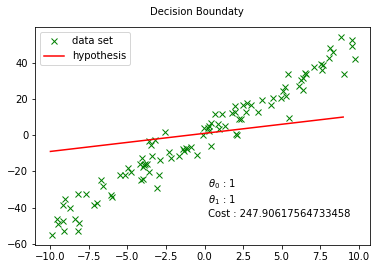

In [8]:
t0 = 1 
t1 = 1 
plot_data_with_hypothesis(x, y, theta0=t0, theta1=t1)

### Cost Function Visualization

In [9]:
def create_cost_plt_grid(cost, interval, num_samples, theta0_offset=0., theta1_offset=0.):
    ''' 
    Creates mesh points for a 3D plot based on a given interval and a cost function
    '''
    x_theta = np.linspace(-interval + theta0_offset, interval + theta0_offset, num = num_samples)
    y_theta = np.linspace(-interval + theta1_offset, interval + theta1_offset, num = num_samples)
    [T0, T1] = np.meshgrid(x_theta, y_theta)
    
    #Z - matrix (x_theta, y_theta)
    Z = np.zeros((len(x_theta), len(y_theta)))

    
    for i in range(len(x_theta)):
        for j in range(len(y_theta)):
            Z[i][j] = cost(x_theta[i], y_theta[j])
            
    return T0, T1, Z

def create_cost_plt(T0, T1, Costs):
    ''' Creates a counter and a surface plot based on given data
    '''
    fig= plt.figure(figsize=(15, 7))
    fig.suptitle("Visualization of MSE Cost Function")
    
    #counter plot
    #ax1 = fig.add_subplot(223)  
    ax1 = plt.subplot(121)
    ax1.margins(0.05)
    cp = ax1.contour(T0, T1, Costs, cmap="rainbow")
    ax1.set_xlabel("Theta 0")
    ax1.set_ylabel("Theta 1")
    

    # surface plot
    ax2 = fig.add_subplot(122, projection="3d")   
    sp = ax2.plot_surface(T0, T1, Costs, cmap="viridis")
    ax2.set_xlabel("Theta 0")
    ax2.set_ylabel("Theta 1")
    ax2.set_zlabel("Costs")
    fig.colorbar(sp)
    plt.show()
    

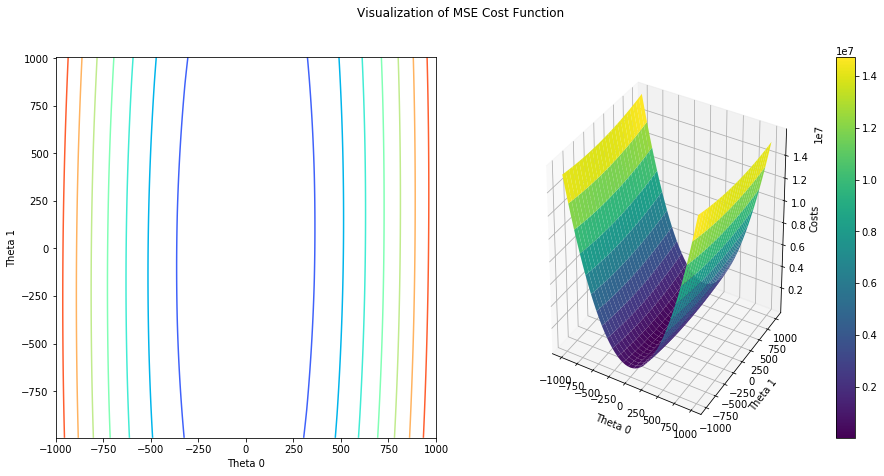

In [10]:
# create some data and plot it

T0, T1, C = create_cost_plt_grid(j, 1000, 51, theta1_offset=5.)
create_cost_plt(T0, T1, C)


###  Gradient Descent

In [11]:
def update_theta(x, y, theta_0, theta_1, learning_rate):
    ''' Updates learnable parameters theta_0 and theta_1 
    
    Args:
        x: array of x values
        y: array of y values corresponding to x
        theta_0: current theta_0 value
        theta_1: current theta_1 value
        learning_rate: value to scale the negative gradient 
        
    Returns:
        t0: Updated theta_0
        t1: Updated theta_1
    '''
    
    m = len(x)
    h_x = linear_hypothesis(theta_0, theta_1)(x)
    temp0 = theta_0 - learning_rate * (1 / m) * (h_x - y).sum()
    temp1 = theta_1 - learning_rate * (1 / m) * ((h_x - y) * x).sum()
    
    return temp0, temp1
    


In [12]:
def gradient_descent(x, y, iterations=1000, learning_rate=0.0001, verbose=False):
    ''' Minimize theta values of a linear model based on MSE cost function
    
    Args:
        x: vector, x values from the data set
        y: vector, y values from the data set
        iterations: scalar, number of theta updates
        learning_rate: scalar, scales the negative gradient 
        verbose: bool, print addition information 
        
    Returns:
        t0s: list of theta_0
        t1s: list of theta_1
        costs: list oft costs
    '''
    t0s = np.zeros(iterations)
    t1s = np.zeros(iterations)
    costs = np.zeros(iterations)
    
    t0s[0] = np.random.random()
    t1s[0] = np.random.random()
    costs[0] = mse_cost_function(x, y)(t0s[0], t1s[0])
    
    theta0_new = t0s[0]
    theta1_new = t1s[0] 
    for i in range(iterations):
        theta0_new, theta1_new = update_theta(x, y, theta0_new, theta1_new, learning_rate)
        t0s[i] = theta0_new
        t1s[i] = theta1_new
        costs[i] = mse_cost_function(x, y)(t0s[i], t1s[i])

        
    return costs, t0s, t1s
        
    
    

In [13]:
cost_hist, t0_hist, t1_hist = gradient_descent(x, y, iterations=250, learning_rate=0.0003, verbose=True)

###  Model and Training Evaluation

In [14]:
def evaluation_plt(cost_hist, theta_0, theta_1, x, y):
    ''' Plots a cost curve and the decision boundary
    
    Args:
        cost_hist: vector, history of all cost values from a opitmization
        theta_0: scalar
        theta_1: scalar
        x: vector, x values from the data set
        y: vector, y values from the data set
    '''
    
    #cost curve
    fig, ax = plt.subplots()
    ax.plot(cost_hist)
    ax.set(xlabel="Iterations", ylabel="Cost",
       title="Cost Curve")
    plt.show()
    
    #desicion boundary
    plot_data_with_hypothesis(x, y, theta0=theta_0, theta1=theta_1)


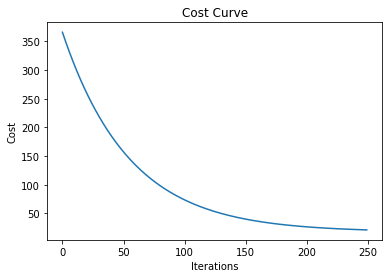

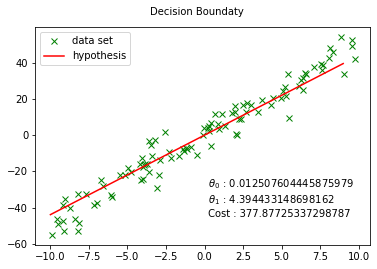

In [15]:
evaluation_plt(cost_hist, t0_hist[-1], t1_hist[-1], x, y)

In [16]:
def optimize_learning_rate(learning_rates, x, y):
    ''' Train a model with diffrent learning rates and plots the costs
    
    Args:
        learning_rates: vector, learning rates used to train a linear model
        x: vector, x values from the data set
        y: vector, y values from the data set
    '''

    fig, ax = plt.subplots(figsize=(20,10))
    #ax.plot(x, y)

    for rate in learning_rates:
        cost_hist, t0_hist, t1_hist = gradient_descent(x, y, iterations=250, learning_rate=rate, verbose=True)
        ax.plot(np.linspace(0, 250, 250), cost_hist, label=f'learning rate {rate}')
       
    ax.set(xlabel="Iterations", ylabel="Costs", title="Cost Curves")
    ax.legend()
    plt.show()

### Optimize Hyperparameter

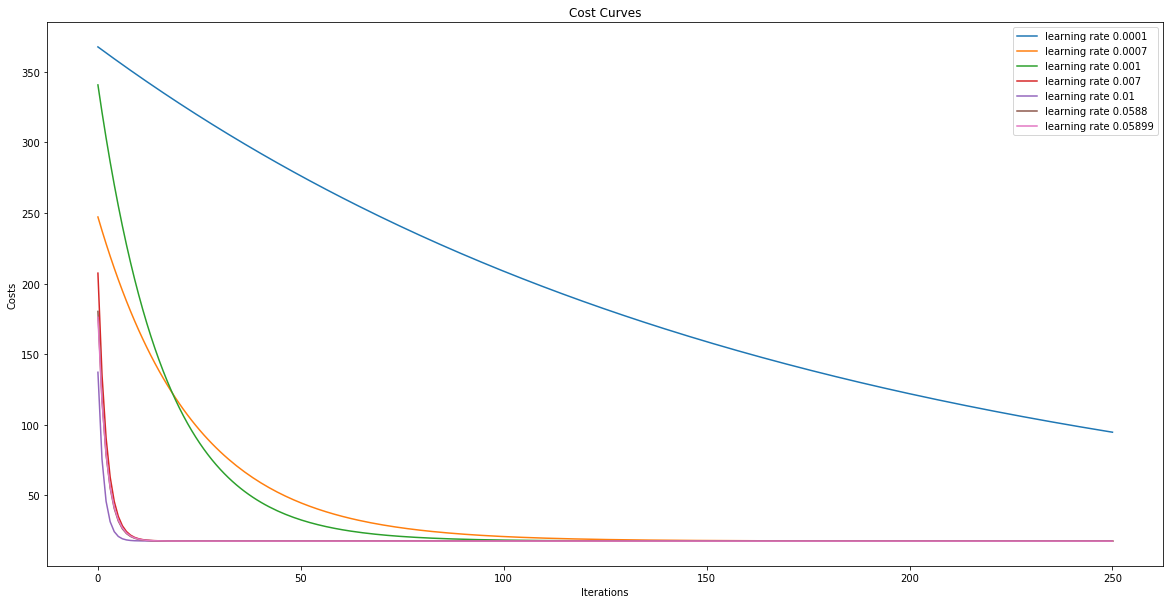

In [17]:
potential_lr = np.array([0.0001, 0.0007, 0.001, 0.007, .01, .0588, .05899])
optimize_learning_rate(potential_lr, x, y)